In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

#### Utility Functions

In [3]:
def process_file(file_path):
    # Read the first line to get the date and starting hour
    with open(file_path, 'r') as file:
        date_line = file.readline().strip()
    
    # Parse the date and starting hour
    date_time = datetime.datetime.strptime(date_line, "%m/%d/%Y %H:%M")
    
    # Read the rest of the file
    df = pd.read_csv(file_path, 
                     skiprows=1, 
                     header=None,
                     usecols=[0, 1, 2, 3],
                     names=['HOUR_INDEX', 'MINUTE', 'SECOND', 'ELECTRIC_FIELD'])
    
    # Create a proper datetime column
    def create_datetime(row):
        hours_to_add = int(row['HOUR_INDEX']) - 1  # Subtract 1 because 1 represents the first hour
        return date_time + datetime.timedelta(hours=hours_to_add, 
                                              minutes=int(row['MINUTE']), 
                                              seconds=int(row['SECOND']))

    df['DATETIME'] = df.apply(create_datetime, axis=1)
    
    # Drop the original time columns if you don't need them
    df = df.drop(columns=['HOUR_INDEX', 'MINUTE', 'SECOND'])
    
    # Reorder columns if desired
    df = df[['DATETIME', 'ELECTRIC_FIELD']]
    
    return df

In [11]:
def calculate_5min_mean(df):
    # Ensure the DATETIME column is in datetime format
    df['DATETIME'] = pd.to_datetime(df['DATETIME'])
    
    # Set DATETIME as the index
    df = df.set_index('DATETIME')
    
    # Group by 5-minute intervals and calculate the mean
    df_5min_mean = df['ELECTRIC_FIELD'].groupby(pd.Grouper(freq='5T')).mean().dropna()
    
    # Convert the result back to a DataFrame
    df_5min_mean = df_5min_mean.to_frame(name='ELECTRIC_FIELD')
    
    return df_5min_mean

In [25]:
def plot_electric_field_mean(df):
    # Create the plot
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['ELECTRIC_FIELD'], linewidth=2)
    
    # Customize the plot
    plt.title('Electric Field Over Time', fontsize=16)
    plt.xlabel('Date and Time', fontsize=12)
    plt.ylabel('Electric Field', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Rotate and align the tick labels so they look better
    plt.gcf().autofmt_xdate()
    
    # Use a tight layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()

#### Usage

In [27]:
# Use the function
file_path = "data/transformed/field_mill_50hz/1996/10/19/199610191700/199610191700.txt"
another_file_path = "data/transformed/field_mill_50hz/1996/10/20/199610200000/199610200000.txt"
df = process_file(file_path)
df2 = process_file(another_file_path)

In [21]:
df.head()

,DATETIME,ELECTRIC_FIELD
0,1996-10-19 17:18:11,292
1,1996-10-19 17:18:12,296
2,1996-10-19 17:18:13,296
3,1996-10-19 17:18:14,288
4,1996-10-19 17:18:15,292


In [15]:
result = calculate_5min_mean(df)

In [17]:
result

,ELECTRIC_FIELD
DATETIME,
1996-10-19 17:15:00,324.990826
1996-10-19 17:20:00,347.186667
1996-10-19 17:25:00,281.080000
1996-10-19 18:15:00,262.128440
1996-10-19 18:20:00,284.508361
...,...
1996-10-21 01:20:00,49.893333
1996-10-21 01:25:00,68.840000
1996-10-21 02:15:00,195.963303


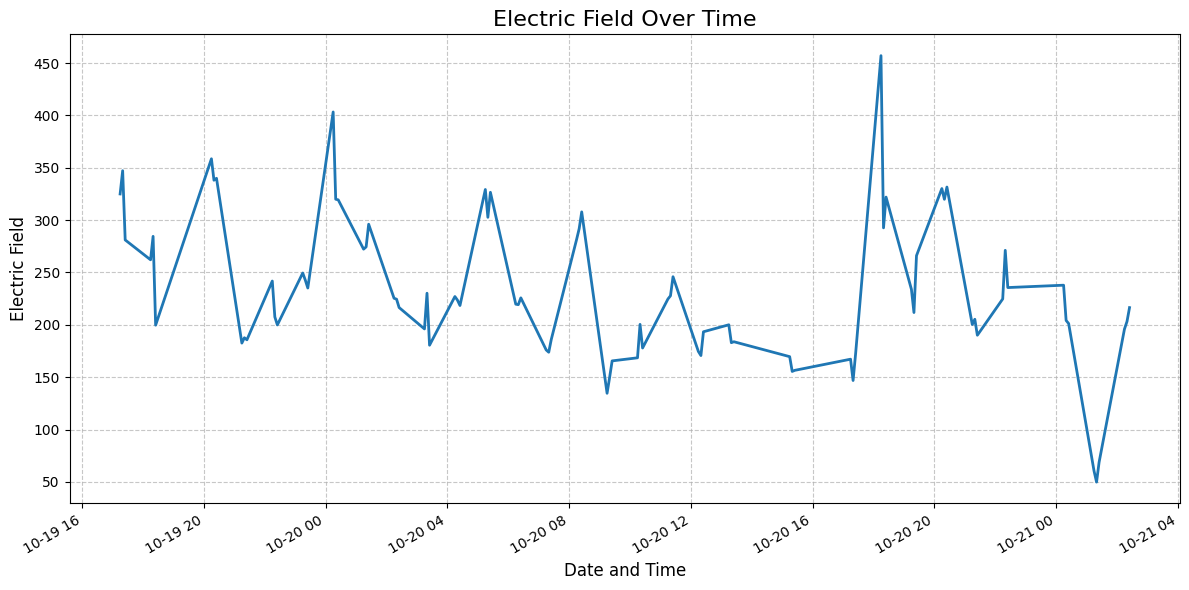

In [26]:
plot_electric_field_mean(result)

In [28]:
result_2 = calculate_5min_mean(df2)

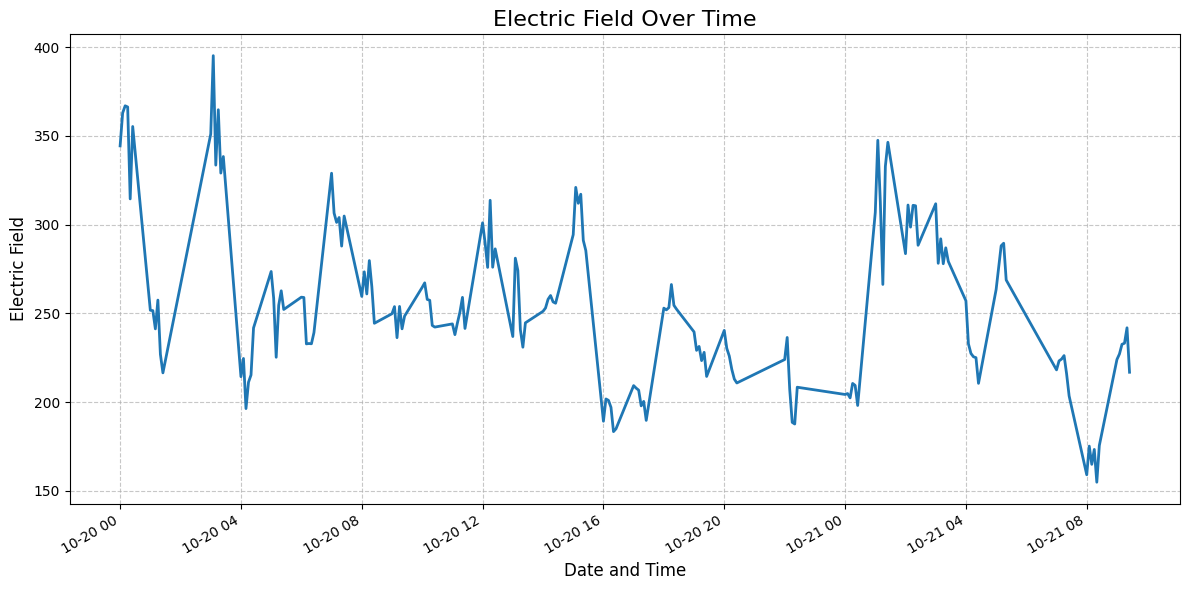

In [29]:
plot_electric_field_mean(result_2)